In [2]:
# Import Modules
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [3]:
# Load the Data
raw_Data= pd.read_excel('BMED_data.xlsx')

# Data Grouping
group_checker = list(raw_Data[['T','V','E','Ci']].iloc[0])
group_index = []
for i in range(len(raw_Data)):
    if not group_checker == list(raw_Data[['T','V','E','Ci']].iloc[i]):
        group_index.append(i)
        group_checker = list(raw_Data[['T','V','E','Ci']].iloc[i])

# MB data
MB_Data = raw_Data[['T','V','E','Ci','t','CF','CA']]
sub_MB_Data = []
for  i in range(len(group_index)):
    if i == 0:
        sub_MB_Data.append(MB_Data.iloc[:group_index[i]])
    else:
        sub_MB_Data.append(MB_Data.iloc[group_index[i-1]:group_index[i]].reset_index(drop=True))

In [29]:
# Set the training data
X = MB_Data[['T','V','E','Ci','t']].values
Y = MB_Data[['CF']].values

# transform the pytorch tensor
Xt = torch.FloatTensor(X)
Yt = torch.FloatTensor(Y)

# Declare the Custom Models
class CustomModel_CF(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Sequential(
            nn.Linear(5,4),
            nn.ReLU(),
            nn.Linear(4,2),
            nn.ReLU(),
            nn.Linear(2,1),
        )

    def forward(self, x):
        t = x[:,4].unsqueeze(1)
        C0 = x[:,3].unsqueeze(1)
        a0 = self.hidden(x).chunk(5, dim=1)

        k = a0[0]**2


        return C0*torch.exp(-k*t)
    
# NN model initialization
model_CF = CustomModel_CF()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_CF.parameters(), lr = 0.0001)

# Learning Loop
num_epochs = 1000000
losses = []

for epoch in range(num_epochs):
    # forward_propagation
    y_pred = model_CF(Xt)
    loss = criterion(y_pred,Yt)

    # back_propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')


        

Epoch [1000/1000000], Loss: 0.154295
Epoch [2000/1000000], Loss: 0.122278
Epoch [3000/1000000], Loss: 0.102120
Epoch [4000/1000000], Loss: 0.086855
Epoch [5000/1000000], Loss: 0.075943
Epoch [6000/1000000], Loss: 0.068754
Epoch [7000/1000000], Loss: 0.064333
Epoch [8000/1000000], Loss: 0.062219
Epoch [9000/1000000], Loss: 0.061464
Epoch [10000/1000000], Loss: 0.061208
Epoch [11000/1000000], Loss: 0.061154
Epoch [12000/1000000], Loss: 0.061130
Epoch [13000/1000000], Loss: 0.060960
Epoch [14000/1000000], Loss: 0.060495
Epoch [15000/1000000], Loss: 0.049926
Epoch [16000/1000000], Loss: 0.040487
Epoch [17000/1000000], Loss: 0.033763
Epoch [18000/1000000], Loss: 0.029746
Epoch [19000/1000000], Loss: 0.028773
Epoch [20000/1000000], Loss: 0.028652
Epoch [21000/1000000], Loss: 0.028608
Epoch [22000/1000000], Loss: 0.028551
Epoch [23000/1000000], Loss: 0.028479
Epoch [24000/1000000], Loss: 0.028399
Epoch [25000/1000000], Loss: 0.028319
Epoch [26000/1000000], Loss: 0.028240
Epoch [27000/1000000]

KeyboardInterrupt: 

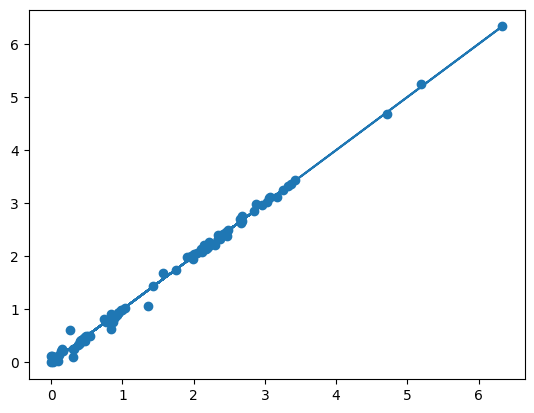

In [30]:
y_pred2 = model_CF(Xt)

plt.scatter(Y,y_pred2.detach().numpy())
plt.plot(Y,Y)

In [31]:
torch.save(model_CF.state_dict(), 'model_CF.pth')

In [32]:
# Set the training data
X = MB_Data[['T','V','E','Ci','t']].values
Y = MB_Data[['CA']].values

# transform the pytorch tensor
Xt = torch.FloatTensor(X)
Yt = torch.FloatTensor(Y)

# Declare the Custom Models
class CustomModel_CA(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Sequential(
            nn.Linear(5,4),
            nn.ReLU(),
            nn.Linear(4,2),
            nn.ReLU(),
            nn.Linear(2,1),
        )

    def forward(self, x):
        t = x[:,4].unsqueeze(1)
        a0= self.hidden(x).chunk(5, dim=1)

        k = a0[0]**2


        return torch.exp(k*t)-1
    
# NN model initialization
model_CA = CustomModel_CA()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_CA.parameters(), lr = 0.0001)

# Learning Loop
num_epochs = 1000000
losses = []

for epoch in range(num_epochs):
    # forward_propagation
    y_pred = model_CA(Xt)
    loss = criterion(y_pred,Yt)

    # back_propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')


        

Epoch [1000/1000000], Loss: 0.498220
Epoch [2000/1000000], Loss: 0.446890
Epoch [3000/1000000], Loss: 0.420790
Epoch [4000/1000000], Loss: 0.383911
Epoch [5000/1000000], Loss: 0.318025
Epoch [6000/1000000], Loss: 0.248408
Epoch [7000/1000000], Loss: 0.198868
Epoch [8000/1000000], Loss: 0.178137
Epoch [9000/1000000], Loss: 0.170855
Epoch [10000/1000000], Loss: 0.168535
Epoch [11000/1000000], Loss: 0.166938
Epoch [12000/1000000], Loss: 0.165264
Epoch [13000/1000000], Loss: 0.162505
Epoch [14000/1000000], Loss: 0.156942
Epoch [15000/1000000], Loss: 0.110127
Epoch [16000/1000000], Loss: 0.059309
Epoch [17000/1000000], Loss: 0.053144
Epoch [18000/1000000], Loss: 0.047378
Epoch [19000/1000000], Loss: 0.023375
Epoch [20000/1000000], Loss: 0.015171
Epoch [21000/1000000], Loss: 0.014653
Epoch [22000/1000000], Loss: 0.014618
Epoch [23000/1000000], Loss: 0.014532
Epoch [24000/1000000], Loss: 0.014332
Epoch [25000/1000000], Loss: 0.013987
Epoch [26000/1000000], Loss: 0.013784
Epoch [27000/1000000]

KeyboardInterrupt: 

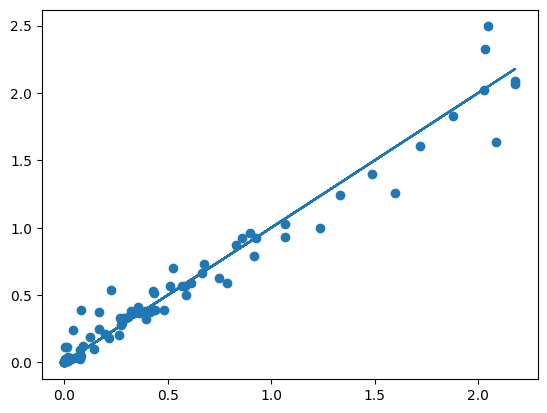

In [33]:
y_pred2 = model_CA(Xt)

plt.scatter(Y,y_pred2.detach().numpy())
plt.plot(Y,Y)

In [34]:
torch.save(model_CA.state_dict(), 'model_CA.pth')